A machine learning project that includes EDA, data cleaning, and implementation of logistic regression and random forests to classify whether credit card applications are approved or denied.

## 1. Credit card applications
<p>Commercial banks receive a lot of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report. Manually analyzing these applications is mundane, error-prone, and time-consuming. Luckily, this task can be automated with machine learning. In this notebook, an automatic credit card approval predictor will be built using machine learning techniques</p>
<p>The <a href="http://archive.ics.uci.edu/ml/datasets/credit+approval">Credit Card Approval dataset</a> from the UCI Machine Learning Repository will be used. The structure of this notebook is as follows:</p>
<ul>
<li>First, begin by loading and viewing the dataset.</li>
<li>Do exploratory data analysis and observe that the dataset has a mixture of both numerical and non-numerical features, that it contains values from different ranges, and that it contains a number of missing entries.</li>
<li>Preprocess the dataset to ensure the machine learning models chosen can make good predictions.</li>
<li>Implement two machine learning models that can predict if an individual's application for a credit card will be accepted or denied, and compare their performance to one another.
</li>
</ul>
<p>First, loading and viewing the dataset. Since this data is confidential, the contributor of the dataset has anonymized the feature names.</p>

In [15]:
# Import pandas
import pandas as pd

# Load dataset
cc_apps = pd.read_csv("datasets/cc_approvals.data", header=None)

# Inspect data
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## 2. Inspecting the applications
<p>That is a unique output! The features of this dataset have been anonymized to protect the privacy of applicants, but <a href="http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html">this blog</a> gives a good overview of the probable features. The probable features in a typical credit card application are <code>Gender</code>, <code>Age</code>, <code>Debt</code>, <code>Married</code>, <code>BankCustomer</code>, <code>EducationLevel</code>, <code>Ethnicity</code>, <code>YearsEmployed</code>, <code>PriorDefault</code>, <code>Employed</code>, <code>CreditScore</code>, <code>DriversLicense</code>, <code>Citizen</code>, <code>ZipCode</code>, <code>Income</code> and finally the <code>ApprovalStatus</code>. We will map these features with respect to the columns in the output.</p>
<p>The dataset has a mixture of numerical and non-numerical features, which will need to be addressed. EDA will help us see if there is anything else that will need to be cleaned.</p>

In [16]:
# Print summary statistics
cc_apps_description = cc_apps.describe()
print(cc_apps_description)

print("\n")

# Print DataFrame information
cc_apps_info = cc_apps.info()
print(cc_apps_info)

print("\n")

# Inspect missing values in the dataset
cc_apps.tail(20)

               2           7          10             14
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000    0.00000       0.000000
25%      1.000000    0.165000    0.00000       0.000000
50%      2.750000    1.000000    0.00000       5.000000
75%      7.207500    2.625000    3.00000     395.500000
max     28.000000   28.500000   67.00000  100000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     690 non-null object
1     690 non-null object
2     690 non-null float64
3     690 non-null object
4     690 non-null object
5     690 non-null object
6     690 non-null object
7     690 non-null float64
8     690 non-null object
9     690 non-null object
10    690 non-null int64
11    690 non-null object
12    690 non-null object
13    690 non-null object
14    690 non-null int64

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,00465,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,00000,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,00240,117,-
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-



<p>It looks like columns 2, 7, 10, and 14 are numerical. A histogram will help visualize the numerical data.</p>

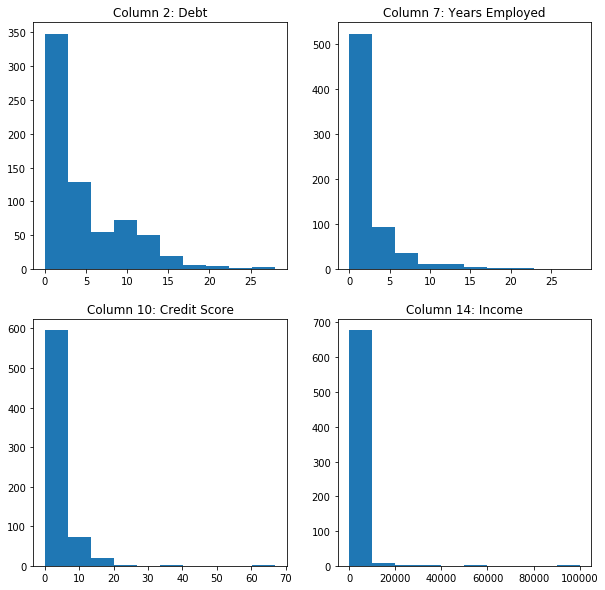

In [18]:
# Import matplotlib
import matplotlib.pyplot as plt

# Create and label histograms
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


ax1.hist(cc_apps[2].dropna())
ax1.set_title('Column 2: Debt')

ax2.hist(cc_apps[7].dropna())
ax2.set_title('Column 7: Years Employed')

ax3.hist(cc_apps[10].dropna())
ax3.set_title('Column 10: Credit Score')

ax4.hist(cc_apps[14].dropna())
ax4.set_title('Column 14: Income')

plt.show()



## 3. Handling the missing values (part i)
<p>The EDA was very revealing! We see from the histograms that the numeric features are very skewed. In addition, there are issues that will affect the performance of our machine learning models if they go unchanged:</p>
<ul>
<li>The dataset contains both numeric and non-numeric data (specifically data that are of <code>float64</code>, <code>int64</code> and <code>object</code> types). Features 2, 7, 10 and 14 contain numeric values (of types float64, float64, int64, and int64, respectively) and all the other features contain non-numeric values.</li>
<li>The dataset contains values from several ranges. One feature has a value range of 0 - 28, while another has a range of 0 - 100000! </li>
<li>Finally, the dataset has missing values, which will be taken care of in this task. The missing values in the dataset are labeled with '?', which can be seen in the tail's output.</li>
</ul>
<p>Now, let's temporarily replace the missing value question marks with NaN.</p>

In [19]:
# Import numpy
import numpy as np

# Inspect missing values in the dataset
print(cc_apps.tail(20))
print("\n")

# Replace the '?'s with NaN
cc_apps = cc_apps.replace('?', np.nan)

# Inspect the missing values again
print(cc_apps.tail(20))

    0      1       2  3  4   5   6      7  8  9   10 11 12     13   14 15
670  b  47.17   5.835  u  g   w   v  5.500  f  f   0  f  g  00465  150  -
671  b  25.83  12.835  u  g  cc   v  0.500  f  f   0  f  g  00000    2  -
672  a  50.25   0.835  u  g  aa   v  0.500  f  f   0  t  g  00240  117  -
673  ?  29.50   2.000  y  p   e   h  2.000  f  f   0  f  g  00256   17  -
674  a  37.33   2.500  u  g   i   h  0.210  f  f   0  f  g  00260  246  -
675  a  41.58   1.040  u  g  aa   v  0.665  f  f   0  f  g  00240  237  -
676  a  30.58  10.665  u  g   q   h  0.085  f  t  12  t  g  00129    3  -
677  b  19.42   7.250  u  g   m   v  0.040  f  t   1  f  g  00100    1  -
678  a  17.92  10.210  u  g  ff  ff  0.000  f  f   0  f  g  00000   50  -
679  a  20.08   1.250  u  g   c   v  0.000  f  f   0  f  g  00000    0  -
680  b  19.50   0.290  u  g   k   v  0.290  f  f   0  f  g  00280  364  -
681  b  27.83   1.000  y  p   d   h  3.000  f  f   0  f  g  00176  537  -
682  b  17.08   3.290  u  g   i   v  0

## 4. Handling the missing values (part ii)
<p>The question marks have all been replaced with NaNs. Rather than simply drop rows with missing values (and lose information that could be used for training with our machine learning models), we are going to impute the missing values with mean imputation.</p>

In [20]:
# Impute the missing values with mean imputation
cc_apps.fillna(cc_apps[[2, 7, 10, 14]].mean(), inplace=True)

# Count the number of NaNs in the dataset to verify
print(cc_apps.isnull().sum())

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64


## 5. Handling the missing values (part iii)
<p>The numeric columns no longer have NaNs, but there are still some missing values to be imputed for columns 0, 1, 3, 4, 5, 6 and 13. All of these columns contain non-numeric data, so the mean imputation strategy would not work here.</p>
<p>Instead, we will impute these missing values with the most frequent values in the respective columns, as is commonly done for categorical data.</p>

In [21]:
# Iterate over each column of cc_apps
for col in cc_apps.columns:
    # Check if the column is of object type
    if cc_apps[col].dtypes == 'object':
        # Impute with the most frequent value
        cc_apps = cc_apps.fillna(cc_apps[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify removal of all NaNs
print(cc_apps.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64


## 6. Preprocessing the data (part i)
<p>The missing values are now successfully handled!</p>
<p>There is still preprocessing needed before we build our models. The remaining preprocessing steps are as follows:</p>
<ol>
<li>Convert the non-numeric data into numeric.</li>
<li>Scale the feature values to a uniform range.</li>
</ol>
<p>First, we will convert all the non-numeric values into numeric ones, as scikit-learn's models require data to be numerical. We will use <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html">label encoding</a>.</p>

In [22]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Iterate over each column and extract their dtypes
for col in cc_apps.columns:
    # Compare if the dtype is object
    if cc_apps[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        cc_apps[col]=le.fit_transform(cc_apps[col])

# Check that everything has been converted to numeric
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     690 non-null int32
1     690 non-null int32
2     690 non-null float64
3     690 non-null int32
4     690 non-null int32
5     690 non-null int32
6     690 non-null int32
7     690 non-null float64
8     690 non-null int32
9     690 non-null int32
10    690 non-null int64
11    690 non-null int32
12    690 non-null int32
13    690 non-null int32
14    690 non-null int64
15    690 non-null int32
dtypes: float64(2), int32(12), int64(2)
memory usage: 54.0 KB


## 7. Preprocessing the data (part ii)
<p>The non-numeric values have all been converted to numeric ones. Now, let's scale the values and try to understand what they mean in the real world. For example, the <code>CreditScore</code> of a person is their creditworthiness based on their credit history. The higher this number, the more financially trustworthy a person is considered to be. So, a <code>CreditScore</code> of 1 is the highest since we will rescale all the values to the range of 0-1.</p>
<p>We will also perform manual feature selection on features like <code>DriversLicense</code> and <code>ZipCode</code>. These are not as important as the other features (one could argue they are not important at all) for predicting credit card approvals, so we will drop them.

In [23]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Drop features 11 and 13 and convert the DataFrame to a NumPy array
cc_apps = cc_apps.drop([11, 13], axis=1)
cc_apps = cc_apps.values

# Separate features and labels into separate variables
X,y = cc_apps[:,0:13] , cc_apps[:,13]

# Instantiate MinMaxScaler and use it to rescale
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

## 8. Splitting the dataset into train and test sets
<p>Now that the data is cleaned, we can build a model to predict which credit card applications will be accepted and which will be rejected. </p>
<p>First, split the data into 80% training and 20% test sets.</p>

In [24]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(rescaledX,
                                y,
                                test_size=0.2,
                                random_state=42)

## 9. Fitting a logistic regression model to the train set
<p>Predicting if a credit card application will be approved or not is a classification task. <a href="http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names">According to UCI</a>, the dataset contains more instances that correspond to "Denied/-" status than instances corresponding to "Approved/+" status. Specifically, out of 690 instances, there are 383 (55.5%) applications that got denied and 307 (44.5%) applications that got approved. This is a good benchmark to bear in mind. A terrible model that labels everything as "Denied" would have a 55.5% accuracy!</p>

<p>It is always better to first implement a simpler model before trying a more complex one. A linear model would be a good first model, as it is simple and linear models tend to do well when features are correlated (which is a safe assumption to make here). Let's start the machine learning modeling with a Logistic Regression model.</p>

In [25]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

#Import F1 score
from sklearn.metrics import f1_score

# Instantiate a LogisticRegression classifier
logreg = LogisticRegression(max_iter = 1000, solver='lbfgs')

# Fit logreg to the train set
logreg.fit(X_train, y_train)

# See how accurate the fit is on the training data
print("Accuracy of logistic regression classifier on training data: ", logreg.score(X_train,y_train))

Accuracy of logistic regression classifier on training data:  0.8713768115942029


## 10. Making predictions and evaluating performance
<p>How well does the model perform on unseen data? </p>
<p>We will evaluate the model on the test set with respect to classification accuracy, and also take a look at the model's confusion matrix. Not only do we want to see how well the model classified approved applications as approved, we also want to see if the model classified denied applications as denied. If the model is not performing well in this aspect, then it might end up approving applications that should have been denied! The confusion matrix will be helpful here.</p>

In [26]:
# Use logreg to predict instances from the test set and store it
y_pred1 = logreg.predict(X_test)

# Get the accuracy of logreg model and print it
print("Accuracy of logistic regression classifier on test data: ", logreg.score(X_test,y_test))

# Print the confusion matrix of the logreg model. We could use scikit-learn's confusion matrix,
# but I prefer pandas' crosstab for clarity reasons.
print("\n")
print(pd.crosstab(y_test, y_pred1, rownames=['True'], colnames=['Predicted'], margins=True))

# Print the F1 score of the logreg model
print("\n")
print("F1 score of logistic regression classifier on test data: ", f1_score(y_test, y_pred1))

# Remind ourselves what value was assigned to the denied symbol "-". 
# Earlier in the notebook we saw that the very last value in the dataframe was "-", so we can check
# what numeric value it was assigned.
print("\n")
print("Numeric value for denied application: ", y[-1])



Accuracy of logistic regression classifier on test data:  0.8333333333333334


Predicted  0.0  1.0  All
True                    
0.0         60   10   70
1.0         13   55   68
All         73   65  138


F1 score of logistic regression classifier on test data:  0.8270676691729324


Numeric value for denied application:  1.0


## 11. Grid searching and making the model perform better
<p>The model did well! Straight out-of-the-box Linear Regression gave an accuracy score of over 83% and an F1 score of 0.827 on unseen data.</p>
<p>For the confusion matrix, the [0,0] element denotes approved applications predicted by the model correctly. The [1,1] element denotes the true positives, meaning the denied applications correctly predicted by the model.</p>
<p>Let's see if we can do better. We can perform a grid search of the model hyperparameters to improve the model's ability to predict credit card approvals by picking the best hyperparameters for the model.</p>
<p>scikit-learn's implementation of logistic regression consists of different hyperparameters, and we will grid search over the following:</p>
<ul>
<li>C</li>
<li>tol</li>
</ul>

In [27]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for the hyperparameters
C_list = np.logspace(0, 4, 10)
tol_list = [0.0001, 0.001, 0.01, 0.1]

# Create a dictionary of hyperparameter values
param_grid = {'C':C_list, 'tol':tol_list} 

## 12. Finding the best performing model
<p>The grid of hyperparameter values has now been defined and converted into a single dictionary format, which <code>GridSearchCV()</code> expects as one of its parameters. Now, we will begin the grid search to see which values perform best.</p>
<p>We will instantiate <code>GridSearchCV()</code> with our earlier <code>logreg</code> model and fit it to the training set. We will also instruct <code>GridSearchCV()</code> to perform a cross-validation of five folds. The parameters that give the best score for the model will be outputted, as well as the best score itself.</p>

In [28]:
# Instantiate GridSearchCV with the required parameters
grid_logreg = GridSearchCV(logreg, param_grid, cv=5)

# Fit training data to logreg_cv
grid_logreg.fit(X_train, y_train)

# Summarize results
print("Tuned logistic regression parameters on training data: ", grid_logreg.best_params_)
print("Accuracy of tuned logistic regression classifier on training data: ", grid_logreg.best_score_)

# Accuracy on test set using tuned hyperparameters
print("Accuracy of tuned logistic regression classifier on test data: ", grid_logreg.score(X_test,y_test))

# Print the confusion matrix of the tuned logreg model.
y_pred2=grid_logreg.predict(X_test)
print("\n")
print(pd.crosstab(y_test, y_pred2, rownames=['True'], colnames=['Predicted'], margins=True))

# Print the F1 score of the logreg model
print("\n")
print("F1 score of tuned logistic regression classifier on test data: ", f1_score(y_test, y_pred2))

Tuned logistic regression parameters on training data:  {'C': 1291.5496650148827, 'tol': 0.1}
Accuracy of tuned logistic regression classifier on training data:  0.8786231884057971
Accuracy of tuned logistic regression classifier on test data:  0.8333333333333334


Predicted  0.0  1.0  All
True                    
0.0         60   10   70
1.0         13   55   68
All         73   65  138


F1 score of tuned logistic regression classifier on test data:  0.8270676691729324


## 13. Can we do better than Logistic Regression?
<p>Tuning our logistic regression model didn't improve the performance on the test set! This, however, isn't surprising. Notice that the tuned logistic regression model improved the accuracy on the training data from 0.871 to 0.879, not a very large improvement. This slight shift wasn't enough to improve the scores on the test data.</p>
<p>We should try to see if we can do a better classification. Since it doesn't appear that we can make the logistic regression model better, let's try a different classification model: a random forest classifier. We will see how this model performs on the data, gridsearching over several different hyperparameter values to tune the model straightaway. </p>


In [29]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate rf
rf = RandomForestClassifier(random_state=42)

# Parameters to grid search over
params_rf = {
    'n_estimators':[25, 50, 100, 200],
    'max_features':['log2', 'auto', 'sqrt'],
    'min_samples_leaf':[5,10,20]
}

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       cv=5,
                       verbose=1,
                       n_jobs=-1)

# Fit training data to grid_rf
grid_rf.fit(X_train,y_train)

# Summarize results
print("Tuned random forest classifier on training data: ", grid_rf.best_params_)
print("Accuracy of tuned random forest classifier on training data: ", grid_rf.best_score_)

# Accuracy on test set using tuned hyperparameters
print("Accuracy of tuned random forest classifier on test data: ", grid_rf.score(X_test,y_test))

# Print the confusion matrix of the tuned random forest model.
y_pred3=grid_rf.predict(X_test)
print("\n")
print(pd.crosstab(y_test, y_pred3, rownames=['True'], colnames=['Predicted'], margins=True))


# Print the F1 score of the rf model
print("\n")
print("F1 score of tuned random forest classifier on test data: ", f1_score(y_test, y_pred3))


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 173 out of 180 | elapsed:    7.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    8.2s finished


Tuned random forest classifier on training data:  {'max_features': 'log2', 'min_samples_leaf': 5, 'n_estimators': 200}
Accuracy of tuned random forest classifier on training data:  0.8713768115942029
Accuracy of tuned random forest classifier on test data:  0.8478260869565217


Predicted  0.0  1.0  All
True                    
0.0         57   13   70
1.0          8   60   68
All         65   73  138


F1 score of tuned random forest classifier on test data:  0.8510638297872339


## 14. Conclusion
<p>The random forest classifier did better on the test data than logistic regression. It obtained an accuracy of 0.848 over logistic regression's 0.833, and an F1 score of 0.851 over 0.827. Interestingly, it performed the same on the training data as the untuned logistic regression model.</p>
<p>Declaring which model is "better" here is tricky. While random forest did better than logistic regression on unseen data, is this slight increase in performance worth the additional model complexity? I personally would say no, and would recommend logistic regression as the model to use.</p>